In [1]:
#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats

#import api key
from config import weather_api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#lat_range = (-10, 4)
#lng_range = (1, 2)

#formatting for bold text
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [2]:
#printing out the minneapolis json to see the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "minneapolis").json()
response

{'coord': {'lon': -93.26, 'lat': 44.98},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 34.07,
  'feels_like': 24.85,
  'temp_min': 32,
  'temp_max': 36,
  'pressure': 1012,
  'humidity': 80},
 'visibility': 14484,
 'wind': {'speed': 9.17, 'deg': 210, 'gust': 18.34},
 'clouds': {'all': 90},
 'dt': 1579707038,
 'sys': {'type': 1,
  'id': 4984,
  'country': 'US',
  'sunrise': 1579700584,
  'sunset': 1579734337},
 'timezone': -21600,
 'id': 5037649,
 'name': 'Minneapolis',
 'cod': 200}

In [3]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add a one second interval between queries to stay within API query limits
time.sleep(1)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

611

In [4]:
#Perform API Calls
#write something more descriptive...

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_info = []

#in order to print the print log according to how the homework looks (change comment before final draft)
i = 1
set_number = 1

print("Beginning Data Retrieval") 
print("--------------------------------")

for j, city in enumerate(cities):
    
    if (j % 50 == 0 and j >= 50):
        set_number = set_number + 1
        i = 0
    print(f"Processing Record {i} of Set {set_number} | {city}")
    i=i+1
   
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        lat = response['coord']['lat']
        name = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lngs = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        city_info.append({"City": name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lngs,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
    except:
        print("City " + color.BOLD + "not " + color.END + "found. Skipping...")
        pass

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | canon city
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | barinas
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | kamaishi
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | vanimo
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | asau
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 1 | khandbari
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | tessalit
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | general pico
Processing Record 22 of Set 1 | kapaa
Processing Record 23

Processing Record 33 of Set 4 | kavaratti
Processing Record 34 of Set 4 | shenjiamen
Processing Record 35 of Set 4 | evensk
Processing Record 36 of Set 4 | dikson
Processing Record 37 of Set 4 | iskateley
Processing Record 38 of Set 4 | maldonado
Processing Record 39 of Set 4 | cheney
Processing Record 40 of Set 4 | bestobe
Processing Record 41 of Set 4 | bubaque
Processing Record 42 of Set 4 | fairfield
Processing Record 43 of Set 4 | whitianga
Processing Record 44 of Set 4 | birin
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | palaiokhora
City not found. Skipping...
Processing Record 47 of Set 4 | soe
Processing Record 48 of Set 4 | athabasca
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 0 of Set 5 | pangai
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | lazaro cardenas
Processing Record 3 of Set 5 | meyungs
City not found. Skipping...
Processing Record 4 of Set 5 | husavik
Processing Record 5 o

Processing Record 21 of Set 8 | seymchan
Processing Record 22 of Set 8 | stornoway
Processing Record 23 of Set 8 | khonuu
City not found. Skipping...
Processing Record 24 of Set 8 | general roca
Processing Record 25 of Set 8 | tandalti
Processing Record 26 of Set 8 | awjilah
Processing Record 27 of Set 8 | hokitika
Processing Record 28 of Set 8 | meulaboh
Processing Record 29 of Set 8 | khandyga
Processing Record 30 of Set 8 | tianpeng
Processing Record 31 of Set 8 | maloy
Processing Record 32 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 33 of Set 8 | high level
Processing Record 34 of Set 8 | amahai
Processing Record 35 of Set 8 | kayerkan
Processing Record 36 of Set 8 | dandong
Processing Record 37 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 8 | kracheh
City not found. Skipping...
Processing Record 39 of Set 8 | ruidoso
Processing Record 40 of Set 8 | ishigaki
Processing Record 41 of Set 8 | phu ly
Processing Record 42 o

Processing Record 3 of Set 12 | praia da vitoria
Processing Record 4 of Set 12 | morehead
Processing Record 5 of Set 12 | dese
Processing Record 6 of Set 12 | bambanglipuro
Processing Record 7 of Set 12 | xam nua
Processing Record 8 of Set 12 | fare
Processing Record 9 of Set 12 | pozzallo
Processing Record 10 of Set 12 | monte alegre de sergipe
Processing Record 11 of Set 12 | haibowan
City not found. Skipping...
Processing Record 12 of Set 12 | pitimbu
Processing Record 13 of Set 12 | villarrica
Processing Record 14 of Set 12 | souillac
Processing Record 15 of Set 12 | udhampur
Processing Record 16 of Set 12 | dien bien
City not found. Skipping...
Processing Record 17 of Set 12 | korcula
Processing Record 18 of Set 12 | segalstad
City not found. Skipping...
Processing Record 19 of Set 12 | menongue
Processing Record 20 of Set 12 | luena
Processing Record 21 of Set 12 | cururupu
Processing Record 22 of Set 12 | iringa
Processing Record 23 of Set 12 | gardelegen
Processing Record 24 of

In [5]:
#export the city data into a csv
#display the dataframe

city_df = pd.DataFrame(city_info)

city_df.to_csv('cities.csv', encoding="utf-8", index_label="City_ID")

city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,100,RU,1579706571,85,71.69,128.87,-23.78,5.55
1,Canon City,1,US,1579707130,59,38.44,-105.24,44.01,9.17
2,Lompoc,90,US,1579706976,93,34.64,-120.46,50.00,6.93
3,Qaanaaq,0,GL,1579706567,51,77.48,-69.36,-12.69,7.49
4,Rikitea,0,PF,1579707159,79,-23.12,-134.97,77.88,10.87
...,...,...,...,...,...,...,...,...,...
549,Soligalich,100,RU,1579707834,90,59.08,42.29,26.37,8.86
550,Dire,100,ML,1579707836,10,12.28,-10.97,104.22,2.51
551,Vila Velha,75,BR,1579707785,78,-20.33,-40.29,81.00,13.87
552,Tautira,42,PF,1579707838,74,-17.73,-149.15,78.80,9.17


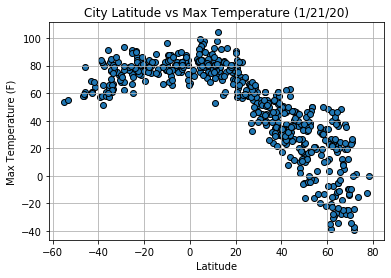

In [6]:
#plot latitude v temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Max Temperature (1/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Temp_v_Latitude.png"))

#for reference on setting limits:
#plt.xlim(-50, 35)
#plt.ylim(20, 100)

**CODE:**  This code is utilizing www.openweathermap.org to gather data on cities around the globe.  We specifically called for info on city name, latitudes, longitudes, cloudiness, humidity, wind speed, country and date.  For the above scatter plot, we looked at max temperature versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

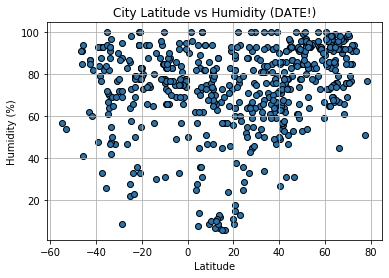

In [7]:
#plot latitude v humidity
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Humidity (DATE!)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Humidity_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at humidity relative to city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

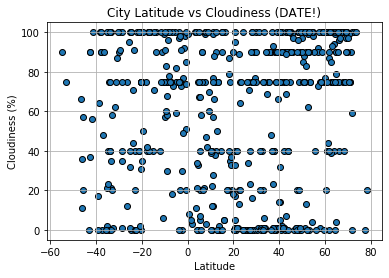

In [8]:
#plot latitude v cloudiness
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Cloudiness (DATE!)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Cloudiness_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at cloudiness versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

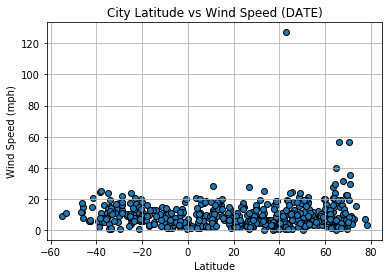

In [9]:
#plot latitude v wind speed
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Wind Speed (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Wind_Speed_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at wind speed versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

In [10]:
#run linear regressions on the above relationships, by hemisphere
#max temp (F) v latitude
#humidity (%) v latitude
#cloudiness (%) v latitude
#wind speed (mph) v latitude

In [95]:
#create northern hemisphere dataframe

#logic test/conditional statement returns a series of boolean values; make sure on the right track
northern_hem = city_df["Lat"] >= 0

#locate where the 'Lat' values are >= 0; reset index for cleaner formatting
northern_df = city_df.loc[city_df["Lat"] >= 0, :].reset_index()

#get rid of newly created 'index' column resulting from above code
northern_df = northern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,100,RU,1579706571,85,71.69,128.87,-23.78,5.55
1,Canon City,1,US,1579707130,59,38.44,-105.24,44.01,9.17
2,Lompoc,90,US,1579706976,93,34.64,-120.46,50.00,6.93
3,Qaanaaq,0,GL,1579706567,51,77.48,-69.36,-12.69,7.49
4,Barinas,42,VE,1579707160,47,8.62,-70.21,87.82,9.04
...,...,...,...,...,...,...,...,...,...
385,Oddur,34,SO,1579707830,28,4.12,43.89,88.43,14.54
386,Port Blair,88,IN,1579707832,79,11.67,92.75,81.14,16.02
387,Soligalich,100,RU,1579707834,90,59.08,42.29,26.37,8.86
388,Dire,100,ML,1579707836,10,12.28,-10.97,104.22,2.51


In [96]:
#create southern hemisphere dataframe

#logic test for my own knowledge; not necessarily needed to create the dataframe
southern_hem = city_df["Lat"] < 0

#create southern hemisphere dataframe
southern_df = city_df.loc[city_df["Lat"] < 0, :].reset_index()
southern_df = southern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,0,PF,1579707159,79,-23.12,-134.97,77.88,10.87
1,Kavieng,0,PG,1579706578,75,-2.57,150.80,83.01,10.29
2,Vanimo,30,PG,1579707165,81,-2.67,141.30,82.33,13.73
3,Vaini,40,TO,1579706566,100,-21.20,-175.20,73.40,1.12
4,Puerto Ayora,20,EC,1579707168,74,-0.74,-90.35,80.60,3.36
...,...,...,...,...,...,...,...,...,...
159,Saint-Pierre,100,RE,1579707298,94,-21.34,55.48,80.60,14.99
160,Ngunguru,0,NZ,1579707831,84,-35.62,174.50,60.01,7.00
161,Alice Springs,71,AU,1579707833,33,-23.70,133.88,89.60,5.82
162,Vila Velha,75,BR,1579707785,78,-20.33,-40.29,81.00,13.87


Text(0, 0.5, 'Max Temperature')

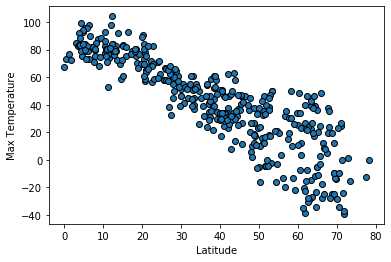

In [97]:
#run linear regression on max temp v latitude (northern hemisphere)

#first create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [98]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      -4.990240
1      41.334321
2      46.628557
3     -13.056983
4      82.880138
         ...    
385    89.149627
386    78.630817
387    12.578263
388    77.780953
389    46.558896
Name: Lat, Length: 390, dtype: float64


In [99]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.39x +94.89


The r-squared is: -0.8693581062591113


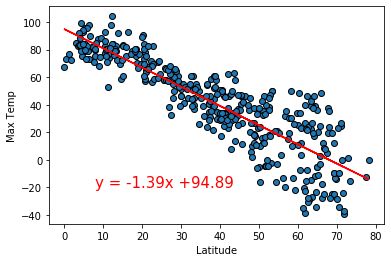

<Figure size 432x288 with 0 Axes>

In [100]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(8,-20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Temp_v_Latitude.png"))

Text(0, 0.5, 'Max Temperature')

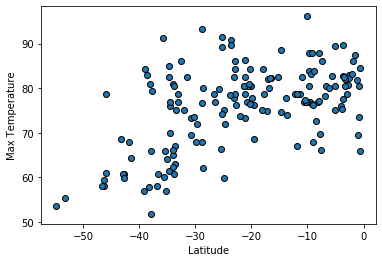

In [101]:
#run linear regression on max temp v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [102]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      75.398466
1      82.865196
2      82.828862
3      76.096087
4      83.530117
         ...    
159    76.045219
160    70.856659
161    75.187726
162    76.412197
163    77.356893
Name: Lat, Length: 164, dtype: float64


In [103]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.36x +83.8


The r-squared is: 0.5329929598400703


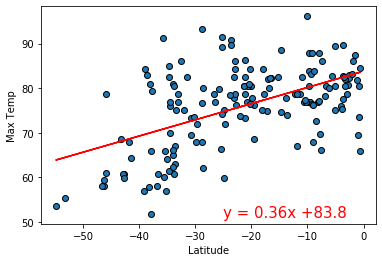

<Figure size 432x288 with 0 Axes>

In [104]:
#create plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-25,51),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Temp_v_Latitude.png"))

**ANALYSIS:**
**_Max Temp v Latitude_**     
The linear regressions for both hemispheres follow what common sense would dictate.  As you approach the equator, heading south, the max temperatures increase.  Similary, approaching the equator heading north, the max temps increase.  For both hemispheres, the farther distance a location is from the equator, the colder the max temperature.  The reason that the linear regressions have opposite-signed slopes is due to the nature of the latitude coordinates (ie North Pole is at 90 degrees, South Pole is at -90 degrees).

Text(0, 0.5, 'Humidity')

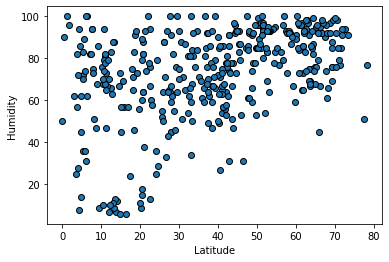

In [105]:
#run linear regression on humidity v lat (northern hemisphere)

#create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [106]:
#perform a linear regression on humidity v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      87.942943
1      72.970955
2      71.259870
3      90.550096
4      59.543445
         ...    
385    57.517160
386    60.916815
387    82.264845
388    61.191489
389    71.282384
Name: Lat, Length: 390, dtype: float64


In [107]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.45x +55.66


The r-squared is: 0.419514460775526


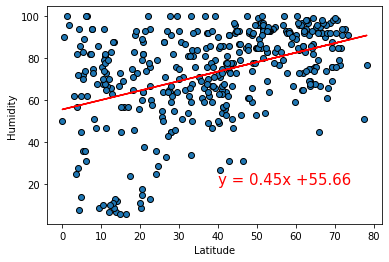

<Figure size 432x288 with 0 Axes>

In [108]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Humidity_v_Latitude.png"))

Text(0, 0.5, 'Humidity')

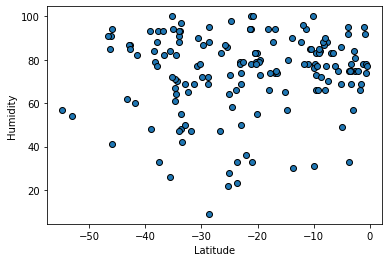

In [109]:
#plot linear regression on humidity v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [110]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      73.776620
1      76.443431
2      76.430453
3      74.025782
4      76.680913
         ...    
159    74.007614
160    72.154473
161    73.701353
162    74.138684
163    74.476090
Name: Lat, Length: 164, dtype: float64


In [111]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.13x +76.78


The r-squared is: 0.09430570205126637


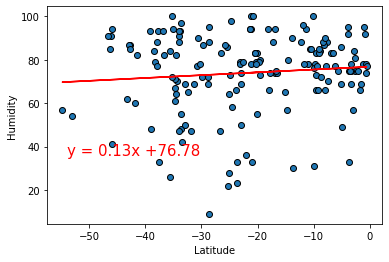

<Figure size 432x288 with 0 Axes>

In [112]:
#create plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-54,36),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save to Images Folder
plt.savefig(os.path.join("Images","Southern_Humidity_v_Latitude.png"))

**ANALYSIS:**
**_Humidity v Latitude_**

Text(0, 0.5, 'Cloudiness')

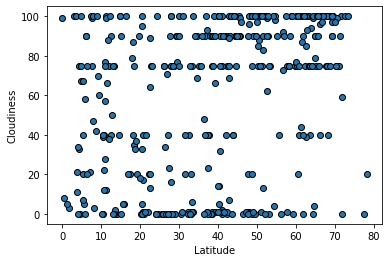

In [113]:
#plot cloudiness v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [114]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      77.088325
1      56.880287
2      54.570797
3      80.607258
4      38.756867
         ...    
385    36.021945
386    40.610537
387    69.424464
388    40.981271
389    54.601185
Name: Lat, Length: 390, dtype: float64


In [115]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.61x +33.52


The r-squared is: 0.3133702816586716


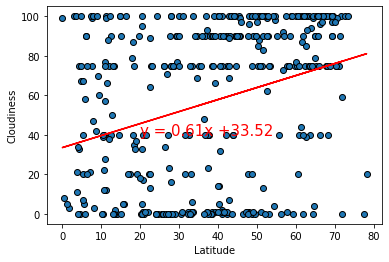

<Figure size 432x288 with 0 Axes>

In [116]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_Cloudiness_v_Latitude.png"))

Text(0, 0.5, 'Cloudiness')

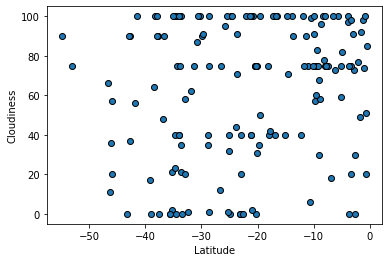

In [117]:
#plot cloudiness v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [118]:
#perform a linear regression on cloudiness v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      61.370481
1      71.617819
2      71.567954
3      62.327896
4      72.530356
         ...    
159    62.258085
160    55.137307
161    61.081262
162    62.761725
163    64.058226
Name: Lat, Length: 164, dtype: float64


In [119]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.5x +72.9


The r-squared is: 0.19317910951573186


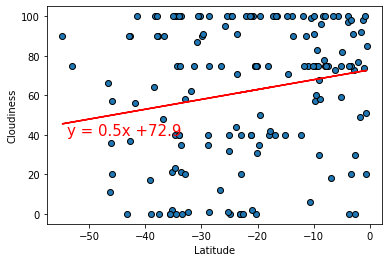

<Figure size 432x288 with 0 Axes>

In [120]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-54,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Cloudiness_v_Latitude.png"))

**ANALYSIS:**
**_Cloudiness v Latitude_**

Text(0, 0.5, 'Wind Speed')

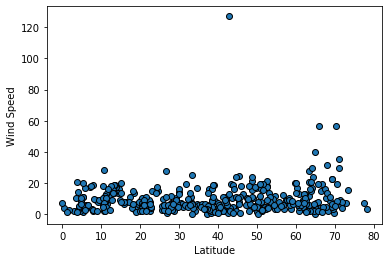

In [121]:
#plot wind speed v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [122]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      11.303621
1       9.501834
2       9.295916
3      11.617376
4       7.885916
         ...    
385     7.642065
386     8.051193
387    10.620297
388     8.084248
389     9.298625
Name: Lat, Length: 390, dtype: float64


In [123]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.05x +7.42


The r-squared is: 0.11598637328050583


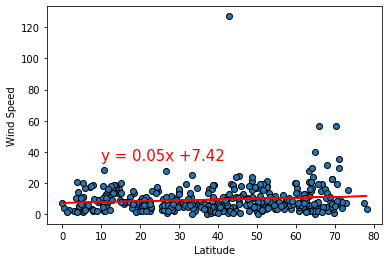

<Figure size 432x288 with 0 Axes>

In [124]:
#create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,35),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_WindSpeed_v_Latitude.png"))

Text(0, 0.5, 'Wind Speed')

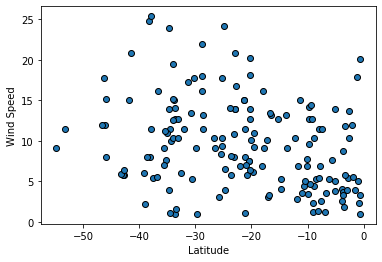

In [125]:
#plot wind speed v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [126]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       9.757627
1       7.217950
2       7.230308
3       9.520343
4       6.991789
         ...    
159     9.537645
160    11.302443
161     9.829306
162     9.412824
163     9.091502
Name: Lat, Length: 164, dtype: float64


In [127]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.12x +6.9


The r-squared is: -0.29902595165976176


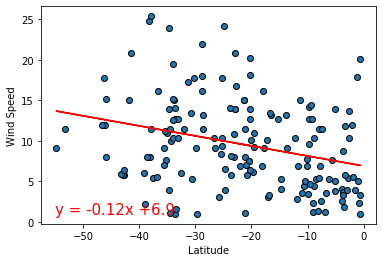

<Figure size 432x288 with 0 Axes>

In [128]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-55,1),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to images folder
plt.savefig(os.path.join("Images","Southern_WindSpeed_v_Latitude.png"))

**ANALYSIS:**
**_Wind Speed v Latitude_**         
